## Optimization using gradient descent

This notebook allows one to do conduct linear and higher-order polynomial fits using the gradient descent method. 




In [2]:
import numpy as np

In [3]:
data_range = np.random.RandomState(1) #make up some fake data for testing
fakex = 10 * data_range.rand(50)
fakey = 2 * fakex - 5 + data_range.randn(50)

In [4]:
def gradient_descent( x, y, gamma, l):
    '''
    theta = Coordinates of the line I'm fitting. list or array
    gamma = Step size: Currently a constant. Later I will add an adaptive method to calculate it
    X = list or array. X values of data I am fitting to.
    y list or array. Y values of the data I am fitting to.
    l = polynomial order of fit
    '''
    n = len(x)

    #create X matrix
    X_matrix = np.zeros((n,l+1))
    theta = np.zeros(l+1)
    
    for i in range(n):
        for j in range(l+1):
            X_matrix[i,j] = x[i]**j
   
    X_matrix_T = X_matrix.T #transpose of X

    #now do it
    k = 1
    kmax = 500
    store_theta = []
    gamma_X_matrix_T = gamma*X_matrix_T
    epsilon = 0.0001
    stop_condition = False
    while not stop_condition:
        store_theta.append(theta)
        X_matrix_times_theta_miny = np.matmul(X_matrix,theta) - y
        theta = theta - np.dot(gamma_X_matrix_T,X_matrix_times_theta_miny)/n
        stop_condition = (np.abs(theta[1] - store_theta[-1][1])/store_theta[-1][1] < epsilon) and (np.abs(theta[0] - store_theta[-1][0])/store_theta[-1][0] < epsilon)
       # stop_condition = (((theta[1]-store_theta[-1][1])**2-(theta[0]-store_theta[-1][0])**2)**0.5/((store_theta[-1][1])**2-(store_theta[-1][0])**2)**0.5 < epsilon) 
        k +=1
    print(k)
    return(store_theta)


In [5]:
b = gradient_descent(x=fakex, y=fakey, gamma=0.001, l=1)
C = gradient_descent(x=fakex, y=fakey, gamma=0.01, l=1)
print(b[-1],C[-1])

1437
842
[-1.59130127  1.51117259] [-4.55669073  1.96028456]


<ipython-input-4-a35c0fad958e>:32: RuntimeWarning: divide by zero encountered in double_scalars
  stop_condition = (np.abs(theta[1] - store_theta[-1][1])/store_theta[-1][1] < epsilon) and (np.abs(theta[0] - store_theta[-1][0])/store_theta[-1][0] < epsilon)


In [6]:
def plotfit(x, b, l):
    if l == 1:
        funct = b[-1][0]+x*b[-1][1]
    elif l == 2:
        funct = b[-1][0]+x*b[-1][1]+x**2*b[-1][2]
    return(funct)

def plotfit2(x, b, l, k=10):
    functs=[]
    g = np.linspace(0,len(b),10)
    g = [int(x) for x in g]
    if l == 1:
        for i in range(len(g)-1):
            functs.append(b[g[i]][0]+x*b[g[i]][1])
    return(functs)

def ColorGradient(start = (256,256,256), stop=(0,0,0), n=2):
    '''
    Pick two colour and gives back gradient of those colours
    '''
    gradR = np.linspace(start[0]/256,stop[0]/256,n)
    gradG = np.linspace(start[1]/256,stop[1]/256,n)
    gradB = np.linspace(start[2]/256,stop[2]/256,n)
    gradient = []
    for i in range(n):
        gradient.append((gradR[i],gradG[i],gradB[i]))


    return gradient

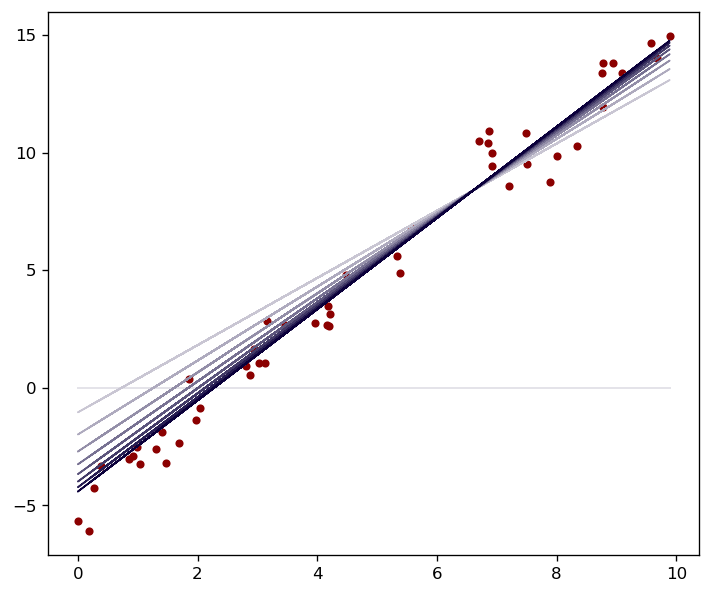

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import mpltools
#from mpltools import color as colors

plt.figure(figsize=(7,6), dpi=120)
plt.scatter(fakex,fakey, c='darkred',  s=15)
nlines = 10
for i in range(nlines):
    plt.plot(fakex,plotfit2(fakex,b=C,l=1)[i-1], color=ColorGradient(stop=(11, 0, 59), n=nlines)[i],lw=1)

#plt.legend()
plt.show()
plt.close()

In [8]:
 d=gradient_descent(x=fakex, y=fakey, gamma=0.0001, l=2)
 print(d[-1])

1853
[-0.13669904  0.00723493  0.16984273]


<ipython-input-4-a35c0fad958e>:32: RuntimeWarning: divide by zero encountered in double_scalars
  stop_condition = (np.abs(theta[1] - store_theta[-1][1])/store_theta[-1][1] < epsilon) and (np.abs(theta[0] - store_theta[-1][0])/store_theta[-1][0] < epsilon)


No handles with labels found to put in legend.


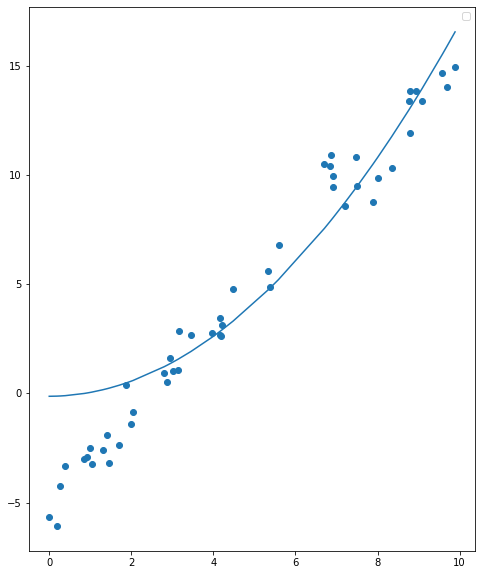

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,10))
plt.scatter(fakex,fakey)
plt.plot(np.unique(fakex), plotfit(np.unique(fakex), d, l=2))
plt.legend()
plt.show()
plt.close()